In [2]:
import sys
!{sys.executable} -m pip install seaborn

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)


In [26]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import holoviews as hv
from holoviews import opts
import hvplot.pandas
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 8)

import seaborn as sns
sns.set_theme(style="whitegrid")

In [10]:
day_ahead_2016_2021_raw = pd.read_csv("../data/entsoe/day_ahead_2016_2021_raw.csv")
day_ahead_2016_2021_raw["TimeStamp"] = pd.to_datetime(day_ahead_2016_2021_raw["TimeStamp"], utc=True)
day_ahead_2016_2021_raw = day_ahead_2016_2021_raw.set_index("TimeStamp")
day_ahead_2016_2021_raw = day_ahead_2016_2021_raw.mask(day_ahead_2016_2021_raw.gt(2000))
day_ahead_2016_2021_raw = day_ahead_2016_2021_raw.resample("15min").ffill().resample("1H").mean()
day_ahead_2016_2021_raw

,PL,FI,ES,NL,EE,HR,LT,LV,HU,FR,RO,RS,CH,BG,PT,AT,SI,CZ
TimeStamp,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00+00:00,NaN,16.04,40.00,22.39,16.04,NaN,16.04,16.04,33.34,22.39,151.00,NaN,40.16,NaN,40.00,18.5000,43.50,15.50
2016-01-01 01:00:00+00:00,NaN,15.74,33.10,20.59,15.74,NaN,15.74,15.74,30.95,20.59,140.15,NaN,36.03,NaN,33.10,17.4725,38.63,14.00
2016-01-01 02:00:00+00:00,NaN,15.57,28.11,16.81,15.57,NaN,15.57,15.57,26.28,16.81,119.00,NaN,33.59,NaN,28.11,14.4875,36.80,10.01
2016-01-01 03:00:00+00:00,NaN,15.47,27.13,17.41,15.47,NaN,15.47,15.47,24.74,17.41,112.03,NaN,32.92,NaN,27.13,12.9725,34.50,8.97
2016-01-01 04:00:00+00:00,NaN,15.75,25.24,17.02,15.75,NaN,15.75,15.75,27.28,17.02,123.53,NaN,32.80,NaN,25.91,14.2275,32.10,12.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 20:00:00+00:00,78.03,51.03,175.12,84.90,78.03,99.37,78.03,78.03,99.37,175.12,99.37,115.41,158.08,194.35,175.12,99.3700,99.37,78.03
2021-12-31 21:00:00+00:00,69.70,35.15,140.38,99.00,69.70,105.01,69.70,69.70,105.01,140.38,105.01,106.44,155.35,205.38,140.38,105.0100,105.01,69.70
2021-12-31 22:00:00+00:00,57.98,29.76,127.81,98.20,57.98,57.98,57.98,57.98,57.98,127.81,57.98,82.64,150.03,113.39,127.81,57.9800,57.98,57.98


array([<AxesSubplot:xlabel='TimeStamp'>, <AxesSubplot:xlabel='TimeStamp'>,
       <AxesSubplot:xlabel='TimeStamp'>, <AxesSubplot:xlabel='TimeStamp'>,
       <AxesSubplot:xlabel='TimeStamp'>, <AxesSubplot:xlabel='TimeStamp'>,
       <AxesSubplot:xlabel='TimeStamp'>, <AxesSubplot:xlabel='TimeStamp'>,
       <AxesSubplot:xlabel='TimeStamp'>, <AxesSubplot:xlabel='TimeStamp'>,
       <AxesSubplot:xlabel='TimeStamp'>, <AxesSubplot:xlabel='TimeStamp'>,
       <AxesSubplot:xlabel='TimeStamp'>, <AxesSubplot:xlabel='TimeStamp'>,
       <AxesSubplot:xlabel='TimeStamp'>, <AxesSubplot:xlabel='TimeStamp'>,
       <AxesSubplot:xlabel='TimeStamp'>, <AxesSubplot:xlabel='TimeStamp'>],
      dtype=object)

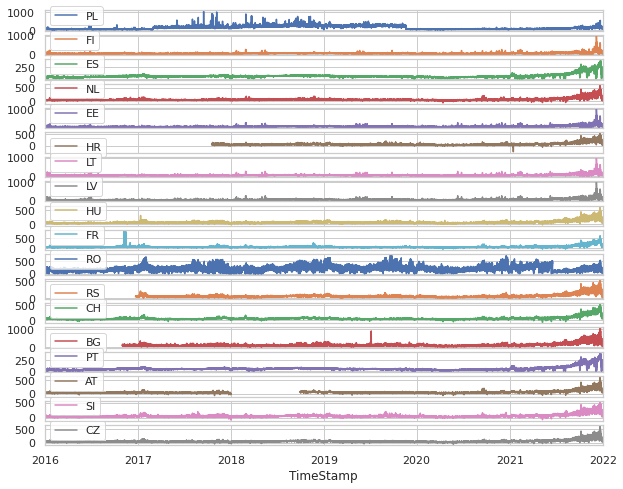

In [22]:
day_ahead_2016_2021_raw.plot(subplots=True)

In [23]:
day_ahead_2019_2021 = pd.read_csv("../data/entsoe/day_ahead_2019_2021.csv")
day_ahead_2019_2021["TimeStamp"] = pd.to_datetime(day_ahead_2019_2021["TimeStamp"], utc=True)
day_ahead_2019_2021 = day_ahead_2019_2021.set_index("TimeStamp")
day_ahead_2019_2021 = day_ahead_2019_2021.resample("15min").ffill().resample("1H").mean().ffill()
day_ahead_2019_2021

,EE,AT,HR,BG,FI,CZ,RS,FR,PT,SK,...,BE,RO,GR,PL,ES,SI,LV,NL,LT,HU
TimeStamp,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00+00:00,10.07,39.76,46.27,47.92,10.07,3.97,51.08,46.27,66.88,3.97,...,66.58,52.690987,67.87,10.045620,66.88,46.27,10.07,64.98,10.07,52.71
2019-01-01 01:00:00+00:00,10.03,39.78,39.78,47.10,10.03,4.70,34.03,39.78,66.00,4.70,...,65.07,36.476395,68.02,10.033982,66.00,39.78,10.03,60.27,10.03,36.49
2019-01-01 02:00:00+00:00,4.56,27.87,27.87,47.06,4.56,0.93,28.49,27.87,63.64,0.93,...,52.17,31.227468,70.00,7.806536,63.64,27.87,4.56,49.97,4.56,31.24
2019-01-01 03:00:00+00:00,4.83,-0.36,-0.36,44.08,4.83,3.90,26.95,23.21,58.85,3.90,...,47.66,25.965665,70.00,6.945350,58.85,-0.36,4.83,47.66,4.83,25.98
2019-01-01 04:00:00+00:00,8.09,-4.45,-4.45,47.02,8.09,7.95,30.90,22.64,55.47,7.95,...,50.87,26.680258,64.83,8.064892,55.47,-4.45,8.09,48.00,8.09,26.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 20:00:00+00:00,78.03,99.37,99.37,194.35,51.03,78.03,115.41,175.12,175.12,78.03,...,6.20,99.370000,181.56,78.030000,175.12,99.37,78.03,84.90,78.03,99.37
2021-12-31 21:00:00+00:00,69.70,105.01,105.01,205.38,35.15,69.70,106.44,140.38,140.38,69.70,...,35.96,105.010000,180.00,69.700000,140.38,105.01,69.70,99.00,69.70,105.01
2021-12-31 22:00:00+00:00,57.98,57.98,57.98,113.39,29.76,57.98,82.64,127.81,127.81,57.98,...,36.34,57.980000,180.00,57.980000,127.81,57.98,57.98,98.20,57.98,57.98


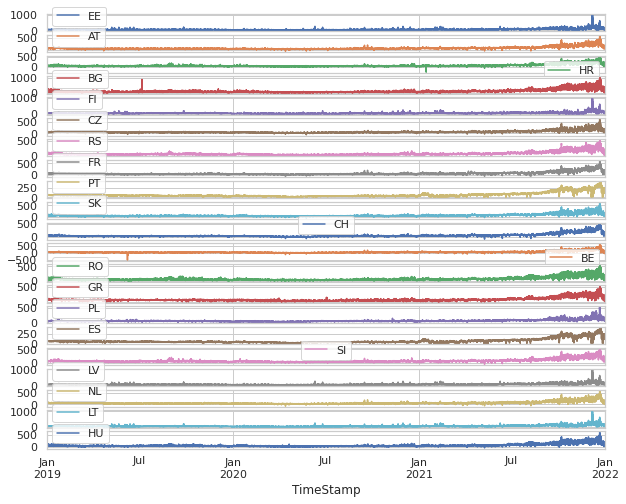

In [24]:
day_ahead_2019_2021.plot(subplots=True)
plt.show()

In [25]:
day_ahead_2019_2021.isnull().mean().mul(100).sort_values(ascending=False)

EE    0.0
BE    0.0
LT    0.0
NL    0.0
LV    0.0
SI    0.0
ES    0.0
PL    0.0
GR    0.0
RO    0.0
CH    0.0
AT    0.0
SK    0.0
PT    0.0
FR    0.0
RS    0.0
CZ    0.0
FI    0.0
BG    0.0
HR    0.0
HU    0.0
dtype: float64

In [27]:
day_ahead_2019_2021.to_csv("../data/entsoe/day_ahead_hourly_2019_2021_cleaned.csv", index=True, index_label="DateTime")